In [18]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
df_train = pd.read_csv(train_697284)
df_train.head()

df_train.shape

df_train['clust_spd'] = df_train['new_clust_spd']

fmla = 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)'

fmla = 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + + C(dow):scale(I(hr**4)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)'

mod = sm.OLS.from_formula(fmla, data=df_train)
res = mod.fit()

res.summary()
pd.options.display.max_columns = 50

In [156]:
# 경로 변수 (고정)


trainfile = '../_data/train_03_997.csv'
old_trainfile = '../_data/train.csv'
kaggle_trainfile = '../_data/train_k.csv'

testfile = '../_data/test_clean.csv'
old_testfile = '../_data/test.csv'

train_171016 = '../_data/171016_dow_hr_pas_L2_dur_only.csv'
train_osrm = '../_data/train_with_osrm.csv'
train_osrm_weather = '../_data/train_with_osrm_and_weather.csv'
train_osrm_weather_hourly = '../_data/train_with_osrm_and_weather_hourly.csv'
train_dropped_nan_fixed = '../_data/train__dropped__no_disaster_nan_fixed.csv'
train_added_airps = '../_data/train__dropped__lnglat_saved__airports__no_disaster.csv'
train_added_airps_cleaned = '../_data/train__dropped__cleaned__airports__no_disaster.csv'
train_added_airps_disas_cleaned = '../_data/train__dropped__cleaned__eval__airports__disaster.csv'
train_added_weekhr = '../_data/train__dropped__cleaned__eval__a_d_weekhour.csv'
train_added_manh = '../_data/train__dropped__air_bliz_weekhr_manh.csv'
train_all_vars_rough = '../_data/train__all_vars__rough.csv'

train_701778_all_vars = '../_data/train__701778__all_vars.csv'
train_700806_all_vars_cooks_dropped = '../_data/train_700806_dropped_cooks.csv'
train_700789_all_vars_cooks_dropped_circle_filter = '../_data/train_700789_dropped_cooks__circle_filter.csv'
train_700789_all_vars_cdcf_kmeans = '../_data/train_kmeans_30_added.csv'
train_700419_all_vars_cdcf150kmh_km60 = '../_data/train_kmeans_60_added_cooksd_circle_150kmh.csv'

train_700419_all_vars_4d_clust120 = '../_data/train_kmeans_4D_120.csv'
train_700419_all_vars_4d_clust120_speed = '../_data/train_kmeans_4D_120_clustspeed.csv'
train_700419_all_vars_4d_clust120_speed_glob = '../_data/train_kmeans_4D_120_clustspeed_globalized.csv'

train_700419 = '../_data/train_700419_recent.csv'
train_700419 = '../_data/train_700419_recent_2047.csv'
train_697355 = '../_data/train_697355_rsq_0722.csv'
train_697349 = '../_data/train_697349_rsq_0723.csv'
train_697284 = '../_data/train_697284_rsq_0725.csv'
train_697284 = '../_data/train_697284_FINAL.csv'
train_697284 = '../_data/train_697284_FINAL_FINAL.csv'
train_696688 = '../_data/train_696688_rsq_0731.csv'

test_recent = '../_data/test_recent_2048.csv'
test_recent = '../_data/test_recent_10150717.csv'

trains = [train_700419, train_697355, train_697349, train_697284, train_696688]


train_recent = trains[3]



# Final formula and variables

In [81]:
fmla = 'np.log(I(dur+1)) ~ C(is_hol)\
+ C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + + C(dow):scale(I(hr**4))\
+ C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1)))\
+ scale(day_snowdepth) + scale(hr_temp)'
fmla

'np.log(I(dur+1)) ~ C(is_hol)+ C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + + C(dow):scale(I(hr**4))+ C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1)))+ scale(day_snowdepth) + scale(hr_temp)'

In [82]:
variables = ['log(duration + 1) ~ \n', 'C(day of week):(4th degree polynomial of hr)',\
             'C(airport pickup/dropoff)', 'modified cluster speed', 'log(OSRM total_time)',\
             'daily snow depth', 'hourly temperature']
print(variables[0] + ' + '.join(variables[1:]))

log(duration + 1) ~ 
C(day of week):(4th degree polynomial of hr) + C(airport pickup/dropoff) + modified cluster speed + log(OSRM total_time) + daily snow depth + hourly temperature


# Data used for training
#### (n = 697284)

In [83]:
df_train = pd.read_csv(train_recent)
df_train.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur,avg_spd
0,0.0,False,0.0,430,Saturday,23,19,59,22.972353,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454.0,24.786272
1,0.0,False,0.0,430,Saturday,23,11,0,28.539090,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409.0,26.462172
2,0.0,False,0.0,430,Saturday,23,38,63,25.137761,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081.0,30.890731
3,0.0,False,0.0,430,Saturday,23,35,55,11.904820,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800.0,12.271050
4,0.0,False,0.0,430,Saturday,23,14,79,13.197395,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151.0,10.808758


### Filter conditions:
* `total_dist == 0`
  * Did not move
  * Model separately with mean duration of subset
* `(total_dist <= 50) & (dur >= 300)`
  * Very slow for long amount of time
* `(avg_spd > 100) & (dur <= 20)`
  * Very fast for short amount of time

# Basic regression results

In [84]:
fmla = 'np.log(I(dur+1)) ~ \
C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(dow):scale(I(hr**4))\
+ C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1)))\
+ scale(day_snowdepth) + scale(hr_temp)'

 dist=0 / dist<=50, dur>=300 / spd>100, dur<=20

In [69]:
df_train['avg_spd'][0]

24.786272352132048

In [71]:
df_other['avg_spd'] = df_aaa['avg_spd']

In [70]:
df_aaa = pd.read_csv('../_data/train_700419_recent_2018.csv')
df_aaa.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,d_clust,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0,430,Saturday,23,143,19,59,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,0.0,False,0,430,Saturday,23,143,11,0,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,0.0,False,0,430,Saturday,23,143,38,63,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,0.0,False,0,430,Saturday,23,143,35,55,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,0.0,False,0,430,Saturday,23,143,14,79,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [8]:
df_copy = df_aaa.copy()
df_copy.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,d_clust,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0,430,Saturday,23,143,19,59,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,0.0,False,0,430,Saturday,23,143,11,0,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,0.0,False,0,430,Saturday,23,143,38,63,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,0.0,False,0,430,Saturday,23,143,35,55,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,0.0,False,0,430,Saturday,23,143,14,79,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


### Conditions for data used in modeling

In [220]:
df_orig = pd.read_csv('../_data/pres_700419_extreme.csv')
df_orig.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,d_clust,clust_spd,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0,430,Saturday,23,143,19,59,22.972353,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,0.0,False,0,430,Saturday,23,143,11,0,28.539090,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,0.0,False,0,430,Saturday,23,143,38,63,25.137761,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,0.0,False,0,430,Saturday,23,143,35,55,11.904820,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,0.0,False,0,430,Saturday,23,143,14,79,13.197395,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [221]:
def is_extreme(df):
    return (   (df['total_dist'] == 0)
             | (   (df['total_dist'] <= 50.0)
                 & (df['dur'] >= 300)
               )
             | (   (df['avg_spd'] > 100.0)
                 & (df['dur'] <= 20)
               )
           )

In [222]:
df_okay = df_orig.loc[~(is_extreme(df_orig))].copy()
df_okay.shape

(697284, 35)

In [232]:
mod_orig = sm.OLS.from_formula(fmla, data=df_orig)
res_orig = mod_orig.fit()

In [233]:
res_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(I(dur + 1))   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                 2.955e+04
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        12:09:59   Log-Likelihood:            -4.4489e+05
No. Observations:              700419   AIC:                         8.899e+05
Df Residuals:                  700376   BIC:                         8.904e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               6.4877      0.001   4682.602      0.000       6.485       6.490
C(is_hol)[T.True]                      -0.1200      0.004    -30.460      0.000      -0.128      -0.112
C(dow)[T.Monday]                       -0.0916      0.002    -43.567      0.000      -0.096      -0.087
C(dow)[T.Saturday]                     -0.0974      0.002    -49.516      0.000      -0.101      -0.094
C(dow)[T.Sunday]                       -0.1962      0.002    -93.966      0.000      -0.200      -0.192
C(dow)[T.Thursday]                      0.0078      0.002      3.906      0.000       0.004       0.012
C(dow)[T.Tuesday]                      -0.0282      0.002    -13.753      0.000      -0.032      -0.024
C(dow)[T.Wednesday]                    -0.0112      0.002     -5.535      0.000      -0.015      -0.007
C(p_LGA)[T.True]                        0.0800      0.004     21.150      0.000       0.073       0.087
C(d_JFK)[T.True]                        0.1243      0.008     16.302      0.000       0.109       0.139
C(d_LGA)[T.True]                       -0.0064      0.006     -1.151      0.250      -0.017       0.005
C(dow)[Friday]:scale(hr)               -0.6336      0.025    -25.327      0.000      -0.683      -0.585
C(dow)[Monday]:scale(hr)               -0.3895      0.032    -12.332      0.000      -0.451      -0.328
C(dow)[Saturday]:scale(hr)             -0.7947      0.024    -33.102      0.000      -0.842      -0.748
C(dow)[Sunday]:scale(hr)               -0.8266      0.025    -33.161      0.000      -0.875      -0.778
C(dow)[Thursday]:scale(hr)             -0.5986      0.028    -21.330      0.000      -0.654      -0.544
C(dow)[Tuesday]:scale(hr)              -0.5648      0.031    -18.295      0.000      -0.625      -0.504
C(dow)[Wednesday]:scale(hr)            -0.7010      0.029    -23.796      0.000      -0.759      -0.643
C(dow)[Friday]:scale(I(hr ** 2))        4.5092      0.114     39.502      0.000       4.286       4.733
C(dow)[Monday]:scale(I(hr ** 2))        3.9267      0.140     27.956      0.000       3.651       4.202
C(dow)[Saturday]:scale(I(hr ** 2))      3.2433      0.109     29.795      0.000       3.030       3.457
C(dow)[Sunday]:scale(I(hr ** 2))        3.0239      0.115     26.304      0.000       2.799       3.249
C(dow)[Thursday]:scale(I(hr ** 2))      5.0286      0.126     39.937      0.000       4.782       5.275
C(dow)[Tuesday]:scale(I(hr ** 2))       5.1131      0.136     37.508      0.000       4.846       5.380
C(dow)[Wednesday]:scale(I(hr ** 2))     5.5904      0.131     42.587      0.000       5.333       5.848
C(dow)[Friday]:scale(I(hr ** 3))       -7.0954      0.168    -42.183      0.000      -7.425      -6.766
C(dow)[Monday]:scale(I(hr ** 3))       -6.5805      0.206    -31.93

In [235]:
mod_okay = sm.OLS.from_formula(fmla, data=df_okay)
res_okay = mod_okay.fit()

In [236]:
res_okay.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(I(dur + 1))   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                 4.501e+04
Date:                Wed, 25 Oct 2017   Prob (F-statistic):               0.00
Time:                        12:14:44   Log-Likelihood:            -3.2994e+05
No. Observations:              697284   AIC:                         6.600e+05
Df Residuals:                  697241   BIC:                         6.605e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               6.4976      0.001   5501.737      0.000       6.495       6.500
C(is_hol)[T.True]                      -0.1267      0.003    -37.742      0.000      -0.133      -0.120
C(dow)[T.Monday]                       -0.0903      0.002    -50.383      0.000      -0.094      -0.087
C(dow)[T.Saturday]                     -0.1050      0.002    -62.617      0.000      -0.108      -0.102
C(dow)[T.Sunday]                       -0.2047      0.002   -114.996      0.000      -0.208      -0.201
C(dow)[T.Thursday]                      0.0079      0.002      4.639      0.000       0.005       0.011
C(dow)[T.Tuesday]                      -0.0272      0.002    -15.533      0.000      -0.031      -0.024
C(dow)[T.Wednesday]                    -0.0105      0.002     -6.128      0.000      -0.014      -0.007
C(p_LGA)[T.True]                        0.0140      0.003      4.347      0.000       0.008       0.020
C(d_JFK)[T.True]                        0.0911      0.007     13.896      0.000       0.078       0.104
C(d_LGA)[T.True]                       -0.0874      0.005    -18.230      0.000      -0.097      -0.078
C(dow)[Friday]:scale(hr)               -0.6060      0.021    -28.413      0.000      -0.648      -0.564
C(dow)[Monday]:scale(hr)               -0.3611      0.027    -13.408      0.000      -0.414      -0.308
C(dow)[Saturday]:scale(hr)             -0.7829      0.020    -38.247      0.000      -0.823      -0.743
C(dow)[Sunday]:scale(hr)               -0.8360      0.021    -39.336      0.000      -0.878      -0.794
C(dow)[Thursday]:scale(hr)             -0.5754      0.024    -24.057      0.000      -0.622      -0.529
C(dow)[Tuesday]:scale(hr)              -0.5422      0.026    -20.611      0.000      -0.594      -0.491
C(dow)[Wednesday]:scale(hr)            -0.6703      0.025    -26.694      0.000      -0.720      -0.621
C(dow)[Friday]:scale(I(hr ** 2))        4.5408      0.097     46.665      0.000       4.350       4.731
C(dow)[Monday]:scale(I(hr ** 2))        3.9108      0.120     32.652      0.000       3.676       4.146
C(dow)[Saturday]:scale(I(hr ** 2))      3.3241      0.093     35.817      0.000       3.142       3.506
C(dow)[Sunday]:scale(I(hr ** 2))        3.1852      0.098     32.499      0.000       2.993       3.377
C(dow)[Thursday]:scale(I(hr ** 2))      5.0749      0.107     47.286      0.000       4.865       5.285
C(dow)[Tuesday]:scale(I(hr ** 2))       5.1481      0.116     44.309      0.000       4.920       5.376
C(dow)[Wednesday]:scale(I(hr ** 2))     5.5933      0.112     49.988      0.000       5.374       5.813
C(dow)[Friday]:scale(I(hr ** 3))       -7.1923      0.143    -50.164      0.000      -7.473      -6.911
C(dow)[Monday]:scale(I(hr ** 3))       -6.5883      0.176    -37.49

### Regression plots (`total_time`) pre-filter

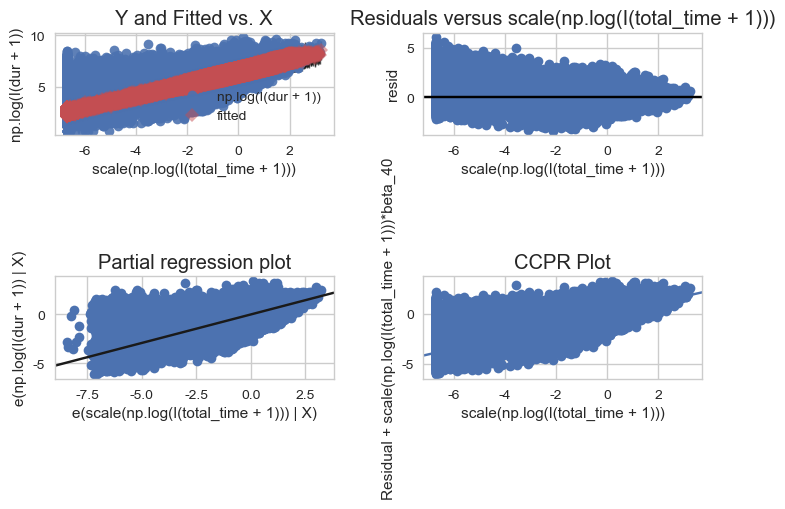

In [245]:
sm.graphics.plot_regress_exog(res_orig, 'scale(np.log(I(total_time + 1)))')
plt.suptitle("")
plt.show()

### Regression plots (`total_time`) post-filter

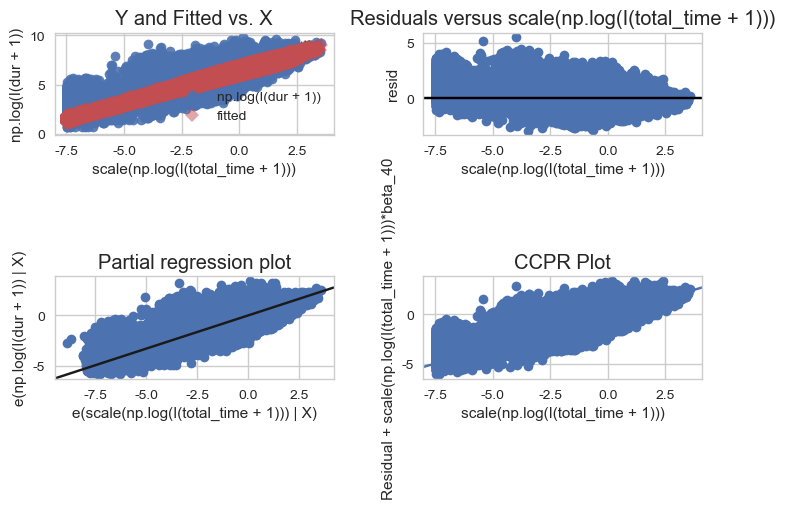

In [244]:
sm.graphics.plot_regress_exog(res_okay, 'scale(np.log(I(total_time + 1)))')
plt.suptitle("")
plt.show()

# Attempt at regularization
### * Grid search with (`hr` degrees, `alpha` for LASSO constraint)

#### * Helper functions

In [224]:
df_train.head(2)

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur,avg_spd
0,0.0,False,0.0,430,Saturday,23,19,59,22.972353,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454.0,24.786272
1,0.0,False,0.0,430,Saturday,23,11,0,28.539090,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409.0,26.462172


In [188]:
def get_date_rowrange(df, d1, d2):
    top = df[(df['m_d'] >= d1)
                   &(df['m_d'] < d2)].iloc[0, :].name
    bot = df[(df['m_d'] >= d1)
                   &(df['m_d'] < d2)].iloc[-1, :].name
    return top, bot

print(get_date_rowrange(df_train, 115, 211))

(476375, 622291)


In [ ]:
df_y = pd.read_csv('../_data/')

In [190]:
df_train[(df_train['m_d'] >= 115)
                   &(df_train['m_d'] < 211)].head(1)

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur,avg_spd
476375,0.0,False,0.0,210,Wednesday,23,13,10,27.847165,False,False,False,False,-74.010849,40.708778,-73.977829,40.788803,11097.6,980.6,39,31,0.01,0.0,0.0,0.0,0.52,-8.9,5.6,0.0,0.0,1374.0,29.076681


In [191]:
df_train[(df_train['m_d'] >= 115)
                   &(df_train['m_d'] < 211)].tail(1)

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur,avg_spd
622291,0.0,False,0.0,115,Friday,0,35,56,14.064045,False,False,False,False,-73.981995,40.740444,-74.0047,40.741806,2787.8,374.0,51,34,0.0,0.0,0.0,2.8,0.54,-5.6,5.6,0.0,0.0,800.0,12.5451


In [193]:
# Number of rows in row range for dates
get_date_rowrange(df_train, 401, 501)[1] - get_date_rowrange(df_train, 401, 501)[0] + 1

179807

### * Custom train_test splitter (based on reference date)
####   Used because of date difference between train and test data

In [194]:
import random


def train_test_date_samples(X, y, train_size=None,\
                            test_size=None,\
                            train_range=(101, 401),
                            test_range=(401, 501)):
    
    train_start, train_end = get_date_rowrange(X, *train_range)
    test_start, test_end = get_date_rowrange(X, *test_range)

    train_cnt = train_end - train_start + 1
    test_cnt = test_end - test_start + 1
    
    if not train_size or train_size > train_cnt:
        train_size = train_cnt
    if not test_size or test_size > test_cnt:
        test_size = test_cnt
    
    train_indices = random.sample(range(train_start, train_end+1),\
                                  k=train_size)
    test_indices = random.sample(range(test_start, test_end+1),\
                                  k=test_size)
    
    print("test_size: {}\ntrain_size: {}".format(test_size, train_size))
    print("test / (train + test) = {}".format(test_size / (train_size + test_size)))
        
    return X.loc[train_indices, :], X.loc[test_indices, :],\
           y.loc[train_indices], y.loc[test_indices]


X, y = df_train.iloc[:, :-1], df_train.iloc[:, -1]
    
a, b, c, d = train_test_date_samples(X, y)

a.shape, b.shape, c.shape, d.shape

test_size: 179807
train_size: 517477
test / (train + test) = 0.257867669414471


((517477, 31), (179807, 31), (517477,), (179807,))

In [198]:
def poly_string(deg, scale_=True):    
    var_ = 'hr'
    poly_sum = 'C(dow):scale({})'.format(var_) if scale_ else 'C(dow):{}'.format(var_)
    for pwr in range(2, deg+1):
        nth_deg = ' + C(dow):scale(I({}**{}))'.format(var_, pwr) if scale_\
                  else ' + C(dow):I({}**{})'.format(var_, pwr)
        poly_sum += nth_deg
    return poly_sum


def get_fmla(hr_deg):
    return 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + '\
         + poly_string(hr_deg)\
         + ' + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd)'\
         + ' + scale(np.log(I(total_time+1))) + scale(day_snowdepth)'\
         + ' + scale(hr_temp)'

print(poly_string(6, True))
print(poly_string(4, False))
get_fmla(7)

C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(dow):scale(I(hr**4)) + C(dow):scale(I(hr**5)) + C(dow):scale(I(hr**6))
C(dow):hr + C(dow):I(hr**2) + C(dow):I(hr**3) + C(dow):I(hr**4)


'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(dow):scale(I(hr**4)) + C(dow):scale(I(hr**5)) + C(dow):scale(I(hr**6)) + C(dow):scale(I(hr**7)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)'

### Cross-validator given degree and alpha

In [246]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

from datetime import datetime

def run_cv_reg(hr_deg, df, alpha, n=3):
    t0 = datetime.now()
    print(t0)

    fmla = get_fmla(hr_deg)
    df = df
    scores = np.zeros(n)

    print("Train has {} rows".format(df.shape[0]))
    print("Test has {} rows".format(df.shape[0]))
    print("formula = {}\n".format(fmla))

    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_date_samples(df.iloc[:, :-1], df.iloc[:, -1],\
                                                                    train_size=100000,\
                                                                    test_size=50000,\
                                                                    train_range=(101, 401),\
                                                                    test_range=(401, 501))
        df_train__ = pd.concat([X_train, y_train], axis=1)

        print("------trial {}------".format(i+1))
        model_train = sm.OLS.from_formula(fmla, data=df_train__)
        res_train = model_train.fit_regularized(alpha=alpha, L1_wt=1.0)

        y_pred = res_train.predict(X_test)
        y_pred = np.exp(y_pred)

        try:
            scores[i] = mean_squared_log_error(y_test, y_pred)
            print(pd.concat([y_test, y_pred], axis=1).head(5))
            print(np.sqrt(scores))
        except:
            print("except")
            print(df.shape)
            print(y_test[y_test<=0].shape)
            print(y_pred[y_pred<=0].shape)
            break

    scores = np.sqrt(scores)
    print(scores)

    t1 = datetime.now()
    print(t1)
    print(t1 - t0)
    print()
    print()
    return scores

In [192]:
df_train.shape

(697284, 32)

* degree range

In [167]:
deg_range = list(range(3, 10))
deg_range

[3, 4, 5, 6, 7, 8, 9]

* alpha range

In [166]:
alpha_range = np.logspace(-3, 1, 5)
alpha_range

array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01])

In [248]:
df_train.shape

(697284, 32)

In [ ]:
n = 5
S = dict()

for deg in deg_range:
    scoreses = dict()
    for alpha in alpha_range:
        print('='*25 + 'RUNNING DEGREE {}, ALPHA {}'.format(deg, alpha) + '='*25)
        scores = run_cv_reg(deg, df_train, alpha, n)
        scoreses[alpha] = scores
    S[deg] = scoreses


=========================RUNNING DEGREE 3, ALPHA 0.001=========================
2017-10-25 12:29:59.757941
Train has 697284 rows
Test has 697284 rows
formula = np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)

test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 1------
          avg_spd            0
10340    6.454101   389.514798
119191  24.630000  1426.076209
144764  18.316262   464.587067
171163  17.345525   415.508858
130552  19.549655   358.194798
[ 3.6078767  0.         0.         0.         0.       ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 2------


In [39]:
S1 = S.copy()

for deg in S1.keys():
    for alpha in S1[deg].keys():
        S1[deg][alpha] = np.mean(S1[deg][alpha])

In [48]:
S1

{3: {0.001: 0.43107966860982677,
  0.01: 0.45350822260954737,
  0.10000000000000001: 0.49500721708551881,
  1.0: 1.298573155600167,
  10.0: 5.8343432609680566},
 4: {0.001: 0.43018388079856973,
  0.01: 0.45151007823385819,
  0.10000000000000001: 0.49694943848541523,
  1.0: 1.298837095908032,
  10.0: 5.8317901478567267},
 5: {0.001: 0.4289577872071561,
  0.01: 0.45278159300942827,
  0.10000000000000001: 0.49634936650548855,
  1.0: 1.2978344490771057,
  10.0: 5.8338843378925462},
 6: {0.001: 0.42854579965315426,
  0.01: 0.45234035158963276,
  0.10000000000000001: 0.4982434771194032,
  1.0: 1.2973681528918455,
  10.0: 5.8330474517760251},
 7: {0.001: 0.42937408625174633,
  0.01: 0.45314065621040339,
  0.10000000000000001: 0.49651019493435616,
  1.0: 1.3005907425694514,
  10.0: 5.8333964054576803},
 8: {0.001: 0.42704283865269943,
  0.01: 0.45176921680189974,
  0.10000000000000001: 0.49732425002855196,
  1.0: 1.3005499574763852,
  10.0: 5.8325918113389363},
 9: {0.001: 0.42652754108221175,

In [62]:
df_res = pd.DataFrame(S1)
df_res

,3,4,5,6,7,8,9
0.001,0.431080,0.430184,0.428958,0.428546,0.429374,0.427043,0.426528
0.010,0.453508,0.451510,0.452782,0.452340,0.453141,0.451769,0.450582
0.100,0.495007,0.496949,0.496349,0.498243,0.496510,0.497324,0.497304
1.000,1.298573,1.298837,1.297834,1.297368,1.300591,1.300550,1.297289
10.000,5.834343,5.831790,5.833884,5.833047,5.833396,5.832592,5.835387


In [185]:
df_res = pd.read_csv('../_data/pres_gridsearch.csv', index_col='alpha')
df_res

,3,4,5,6,7,8,9
alpha,,,,,,,
0.001,0.431080,0.430184,0.428958,0.428546,0.429374,0.427043,0.426528
0.010,0.453508,0.451510,0.452782,0.452340,0.453141,0.451769,0.450582
0.100,0.495007,0.496949,0.496349,0.498243,0.496510,0.497324,0.497304
1.000,1.298573,1.298837,1.297834,1.297368,1.300591,1.300550,1.297289
10.000,5.834343,5.831790,5.833884,5.833047,5.833396,5.832592,5.835387


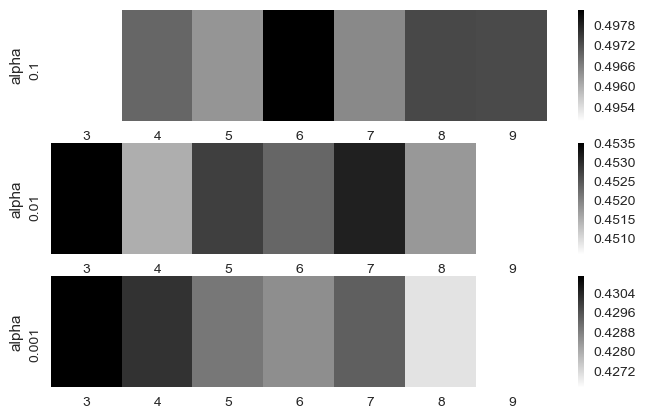

In [187]:
plt.subplot(311)
plt.ylabel = 'alpha'
plt.xlabel = 'degree of hr'
sns.heatmap(df_res.iloc[2:3, :], cmap='binary')

plt.subplot(312)
plt.ylabel = 'alpha'
plt.xlabel = 'degree of hr'
sns.heatmap(df_res.iloc[1:2, :], cmap='binary')

plt.subplot(313)
plt.ylabel = 'alpha'
plt.xlabel = 'degree of hr'
sns.heatmap(df_res.iloc[0:1, :], cmap='binary')

plt.show()

### * No regularization performed.

# Final prediction

In [155]:
df_test = pd.read_csv(test_recent)
df_test.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip
0,0.0,False,0.0,630,Thursday,23,58,45,17.343755,False,False,False,False,-73.998291,40.722618,-73.971779,40.762470,5280.3,623.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
1,0.0,False,0.0,630,Thursday,23,22,6,19.795471,False,False,False,False,-73.955109,40.689564,-73.978203,40.685802,2573.5,219.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
2,0.0,False,0.0,630,Thursday,23,36,6,20.224880,False,False,False,False,-73.978416,40.791576,-73.973160,40.675968,15048.8,1300.0,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
3,0.0,False,0.0,630,Thursday,23,3,31,40.972632,False,True,False,False,-73.873093,40.774097,-73.926704,40.856739,16818.3,1029.1,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
4,0.0,False,0.0,630,Thursday,23,53,56,15.825632,False,False,False,False,-73.979416,40.755211,-74.003548,40.738224,3536.7,434.5,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0


In [157]:
test_pred_log = res.predict(df_test)
test_pred = np.exp(test_pred_log)
test_pred.head()

0    1132.648731
1     450.522930
2    2100.667327
3    1504.903759
4     837.215176
dtype: float64

In [158]:
test_pred.loc[393:394]

393    2016.411595
394       4.251729
dtype: float64

In [159]:
df_test.loc[:, 'dur'] = test_pred
avg_zero = 503.51274886482713
df_test.loc[df_test['total_dist'] == 0.0, 'dur'] = avg_zero
test_pred = df_test.loc[:, 'dur']

test_pred.loc[393:394]

393    2016.411595
394     503.512749
Name: dur, dtype: float64

In [160]:
test_pred.head()

0    1132.648731
1     450.522930
2    2100.667327
3    1504.903759
4     837.215176
Name: dur, dtype: float64

### Constructing final answer file

In [17]:
np.logspace(-3, 2, 6)

array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02])

In [99]:
df_test_orig = pd.read_csv('../_data/test.csv')
df_test_orig.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2332349,2,6/30/16 23:59,5,-73.998291,40.722618,-73.971779,40.762470,N
1,id2013516,1,6/30/16 23:59,2,-73.955109,40.689564,-73.978203,40.685802,N
2,id3719493,2,6/30/16 23:59,1,-73.978416,40.791576,-73.973160,40.675968,N
3,id0376262,1,6/30/16 23:59,2,-73.873093,40.774097,-73.926704,40.856739,N
4,id2105228,1,6/30/16 23:58,1,-73.979416,40.755211,-74.003548,40.738224,N


In [100]:
df_test_orig.shape

(346797, 9)

In [101]:
test_pred.shape

(346797,)

In [163]:
df_final = pd.concat([df_test_orig['id'], test_pred], axis=1, names=['id', 'trip_duration'])
df_final.columns = ['id', 'trip_duration']
df_final.loc[394:396, :]

,id,trip_duration
394,id2447155,503.512749
395,id1398839,598.186333
396,id1845621,605.193967


In [106]:
df_final.head()

,id,trip_duration
0,id2332349,1132.648731
1,id2013516,450.522930
2,id3719493,2100.667327
3,id0376262,1504.903759
4,id2105228,837.215176


# Assessment by RMSLE

In [46]:
S1[3].keys()

dict_keys([0.001, 0.01, 0.10000000000000001, 1.0, 10.0])

In [47]:
for deg in S1.keys():
    for alpha in S1[deg].keys():
        S1[deg][alpha] = np.mean(S1[deg][alpha])


In [48]:
S1

{3: {0.001: 0.43107966860982677,
  0.01: 0.45350822260954737,
  0.10000000000000001: 0.49500721708551881,
  1.0: 1.298573155600167,
  10.0: 5.8343432609680566},
 4: {0.001: 0.43018388079856973,
  0.01: 0.45151007823385819,
  0.10000000000000001: 0.49694943848541523,
  1.0: 1.298837095908032,
  10.0: 5.8317901478567267},
 5: {0.001: 0.4289577872071561,
  0.01: 0.45278159300942827,
  0.10000000000000001: 0.49634936650548855,
  1.0: 1.2978344490771057,
  10.0: 5.8338843378925462},
 6: {0.001: 0.42854579965315426,
  0.01: 0.45234035158963276,
  0.10000000000000001: 0.4982434771194032,
  1.0: 1.2973681528918455,
  10.0: 5.8330474517760251},
 7: {0.001: 0.42937408625174633,
  0.01: 0.45314065621040339,
  0.10000000000000001: 0.49651019493435616,
  1.0: 1.3005907425694514,
  10.0: 5.8333964054576803},
 8: {0.001: 0.42704283865269943,
  0.01: 0.45176921680189974,
  0.10000000000000001: 0.49732425002855196,
  1.0: 1.3005499574763852,
  10.0: 5.8325918113389363},
 9: {0.001: 0.42652754108221175,

In [109]:
df_ans = pd.read_csv('../_data/testset_answer/test_answer_nyc_taxi.csv',\
                    usecols=['id', 'trip_duration'])

df_ans.head()

C:\Users\jchoi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,trip_duration
0,id2332349,1442.0
1,id2013516,754.0
2,id3719493,2609.0
3,id0376262,2546.0
4,id2105228,656.0


In [124]:
from sklearn.metrics import mean_squared_log_error

y_ans = df_ans.loc[0:346796, 'trip_duration']
y_pred = df_final['trip_duration']

try:
    score = np.sqrt(mean_squared_log_error(y_ans, y_pred))
except:
    print("except")
    print(y_test[y_test<=0].shape)
    print(y_pred[y_pred<=0].shape)


print("Final score (RMSLE): {}".format(score))

Final score (RMSLE): 0.4832057518771819


# Partial comparison

In [172]:
df_res = np.log(df_res)
df_res

,3,4,5,6,7,8,9
alpha,,,,,,,
0.001,-0.841462,-0.843543,-0.846397,-0.847358,-0.845427,-0.850871,-0.852078
0.010,-0.790742,-0.795158,-0.792345,-0.793320,-0.791553,-0.794584,-0.797215
0.100,-0.703183,-0.699267,-0.700475,-0.696666,-0.700151,-0.698513,-0.698554
1.000,0.261266,0.261469,0.260697,0.260338,0.262819,0.262787,0.260277
10.000,1.763762,1.763324,1.763683,1.763540,1.763599,1.763461,1.763941


In [126]:
df_comp = pd.concat([y_ans, y_pred], axis=1)
df_comp.head(10)

,trip_duration,trip_duration
0,1442.0,1132.648731
1,754.0,450.522930
2,2609.0,2100.667327
3,2546.0,1504.903759
4,656.0,837.215176
5,712.0,637.322862
6,621.0,452.509077
7,849.0,752.324729
8,472.0,493.986523
9,463.0,451.355365


In [173]:
df_res1 = df_res.iloc[0:3, :].copy()
df_res1

,3,4,5,6,7,8,9
alpha,,,,,,,
0.001,-0.841462,-0.843543,-0.846397,-0.847358,-0.845427,-0.850871,-0.852078
0.010,-0.790742,-0.795158,-0.792345,-0.793320,-0.791553,-0.794584,-0.797215
0.100,-0.703183,-0.699267,-0.700475,-0.696666,-0.700151,-0.698513,-0.698554


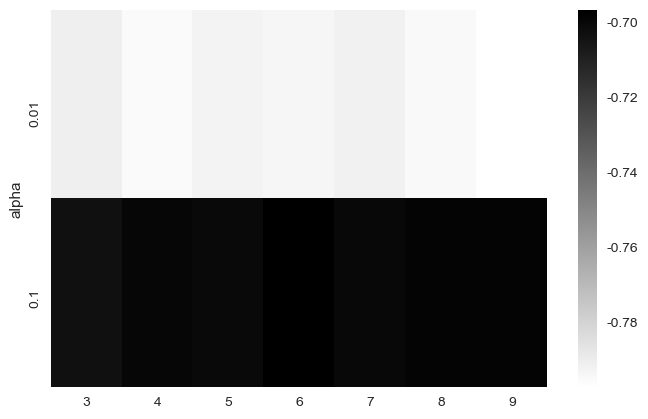

In [181]:
plt.ylabel = 'alpha'
plt.xlabel = 'degree of hr'
sns.heatmap(df_res.iloc[1:2, :], cmap='binary')

plt.show()

In [104]:
df_final.loc[394, :]

id               id2447155
trip_duration      503.513
Name: 394, dtype: object

In [103]:
df_final.columns = ['id', 'trip_duration']

In [151]:
test_pred.loc[393:394]

393    2016.411595
394     503.512749
Name: dur, dtype: float64

In [148]:
test_pred.head()

0    1132.648731
1     450.522930
2    2100.667327
3    1504.903759
4     837.215176
dtype: float64

In [39]:
fmla == 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + + C(dow):scale(I(hr**4)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp)'

False

In [145]:
avg_zero = 503.51274886482713
df_test.loc[df_test['total_dist'] == 0.0, 'dur'] = avg_zero
test_pred = df_test.loc[:, 'dur']

In [142]:
test_pred = df_test.loc[:, 'dur']